In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst = np.expand_dims(X_tst, 1)
print(X_tst.shape)

cfg = additive_1x2_uniform_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 1, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_01_generator.Generator
clip_op_lambda = (lambda x: clip_op_01(x))
Trainer = trainer.Trainer

In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform/model-400000


2019-02-13 06:16:26,304:INFO:Restoring parameters from experiments/additive_1x2_uniform/model-400000
2019-02-13 06:16:30,130:INFO:TEST BATCH-0: t = 3.7864, Revenue: 0.206282, Regret: 0.000000, IRP: 0.000000
2019-02-13 06:16:30,140:INFO:TEST BATCH-1: t = 3.7921, Revenue: 0.206607, Regret: 0.000000, IRP: 0.000000
2019-02-13 06:16:30,149:INFO:TEST BATCH-2: t = 3.7973, Revenue: 0.207053, Regret: 0.000000, IRP: 0.000000
2019-02-13 06:16:30,158:INFO:TEST BATCH-3: t = 3.8023, Revenue: 0.207633, Regret: 0.000000, IRP: 0.000000
2019-02-13 06:16:30,166:INFO:TEST BATCH-4: t = 3.8071, Revenue: 0.208356, Regret: 0.000000, IRP: 0.000000
2019-02-13 06:16:30,174:INFO:TEST BATCH-5: t = 3.8116, Revenue: 0.209221, Regret: 0.000000, IRP: 0.000000
2019-02-13 06:16:30,181:INFO:TEST BATCH-6: t = 3.8159, Revenue: 0.210226, Regret: 0.000000, IRP: 0.000000
2019-02-13 06:16:30,188:INFO:TEST BATCH-7: t = 3.8201, Revenue: 0.211364, Regret: 0.000000, IRP: 0.000000
2019-02-13 06:16:30,195:INFO:TEST BATCH-8: t = 3.82

2019-02-13 06:16:30,696:INFO:TEST BATCH-76: t = 4.1249, Revenue: 0.461135, Regret: 0.000021, IRP: 0.000000
2019-02-13 06:16:30,703:INFO:TEST BATCH-77: t = 4.1292, Revenue: 0.465590, Regret: 0.000001, IRP: 0.000000
2019-02-13 06:16:30,711:INFO:TEST BATCH-78: t = 4.1335, Revenue: 0.470030, Regret: 0.000007, IRP: 0.000000
2019-02-13 06:16:30,718:INFO:TEST BATCH-79: t = 4.1378, Revenue: 0.474457, Regret: 0.000011, IRP: 0.000000
2019-02-13 06:16:30,725:INFO:TEST BATCH-80: t = 4.1420, Revenue: 0.478870, Regret: 0.000000, IRP: 0.000000
2019-02-13 06:16:30,732:INFO:TEST BATCH-81: t = 4.1463, Revenue: 0.483269, Regret: 0.000003, IRP: 0.000000
2019-02-13 06:16:30,739:INFO:TEST BATCH-82: t = 4.1513, Revenue: 0.487656, Regret: 0.000012, IRP: 0.000000
2019-02-13 06:16:30,747:INFO:TEST BATCH-83: t = 4.1558, Revenue: 0.492030, Regret: 0.000001, IRP: 0.000000
2019-02-13 06:16:30,753:INFO:TEST BATCH-84: t = 4.1601, Revenue: 0.496392, Regret: 0.000000, IRP: 0.000000
2019-02-13 06:16:30,761:INFO:TEST BAT

2019-02-13 06:16:31,145:INFO:TEST BATCH-153: t = 4.4058, Revenue: 0.799601, Regret: 0.000000, IRP: 0.000000
2019-02-13 06:16:31,150:INFO:TEST BATCH-154: t = 4.4087, Revenue: 0.801085, Regret: 0.000001, IRP: 0.000000
2019-02-13 06:16:31,155:INFO:TEST BATCH-155: t = 4.4118, Revenue: 0.802425, Regret: 0.000001, IRP: 0.000000
2019-02-13 06:16:31,160:INFO:TEST BATCH-156: t = 4.4153, Revenue: 0.803636, Regret: 0.000001, IRP: 0.000000
2019-02-13 06:16:31,165:INFO:TEST BATCH-157: t = 4.4187, Revenue: 0.804731, Regret: 0.000001, IRP: 0.000000
2019-02-13 06:16:31,170:INFO:TEST BATCH-158: t = 4.4216, Revenue: 0.805723, Regret: 0.000001, IRP: 0.000000
2019-02-13 06:16:31,175:INFO:TEST BATCH-159: t = 4.4248, Revenue: 0.806622, Regret: 0.000001, IRP: 0.000000
2019-02-13 06:16:31,180:INFO:TEST BATCH-160: t = 4.4282, Revenue: 0.807438, Regret: 0.000001, IRP: 0.000000
2019-02-13 06:16:31,184:INFO:TEST BATCH-161: t = 4.4310, Revenue: 0.808179, Regret: 0.000002, IRP: 0.000000
2019-02-13 06:16:31,189:INFO

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)

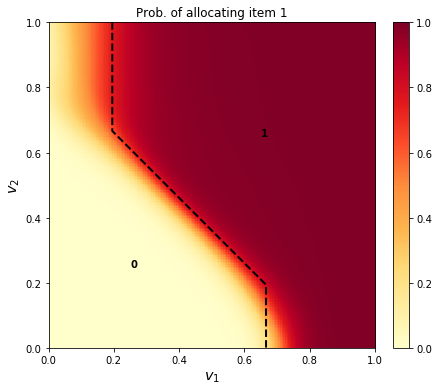

In [6]:
x1 = (2.0 - np.sqrt(2.0))/3.0
x2 = 2.0/3.0
points = [(x1, 1.0), (x1, x2), (x2, x1), (x2, 0)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))


fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
                    
plt.text(0.25, 0.25, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.65, 0.65, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

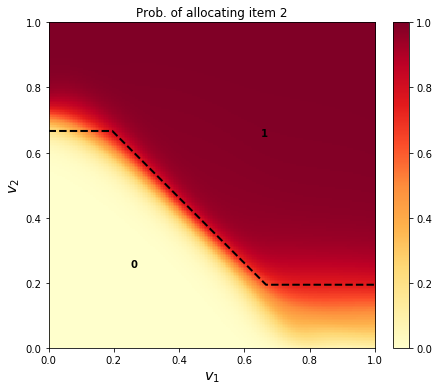

In [7]:
x1 = (2.0 - np.sqrt(2.0))/3.0
x2 = 2.0/3.0
points = [(0.0, x2), (x1, x2), (x2, x1), (1.0, x1)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
              
plt.text(0.25, 0.25, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.65, 0.65, s='1', color='black', fontsize='10', fontweight='bold')
    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)